# Chapter 6 of syllabus Transient Groundwater FLow


@T.N.Olsthoorn, Dec. 2019

# Transient wells

## Introduction

There are two important formulas to compute the flow to a well pumping at a constant rate from $t=0$.
    1) The solution by Theis (1935) for the confined aquifer (approximated also for unconfined aquifer)
    2) The solution by Hantush (1956) for the semi-confined aquifer.
    
Theis:
$$s(r, t) = \frac{Q} {4 \pi kD} {\mathtt{W}(u)}, \,\,\,\,u=\frac{r^2 S}{4 kD \,t}$$

Hantush
$$s(r, t) = \frac{Q} {4 \pi kD} \mathtt{W}_h\left(u, \frac r {\lambda}\right), \,\,\,\,u=\frac{r^2 S}{4 kD \,t}$$

where

$$\mathtt{W}(u) = \mathtt{expint}(u) = \intop_u^\infty \frac {e^{-y}} {y} dy =
-\gamma - \ln u + u - \frac {u^2}{2\times 2!} + \frac{u_3}{3 \times 3!} - \frac{u^4}{4\times4!}+...$$

$$\gamma=0.577216...$$

and

$$\mathtt{W}_h\left(u, \frac r \lambda\right) = \intop_u^\infty
\frac {e^   {-y - \frac   {\left(\frac {r}{2 \lambda}\right)^2} {y}  }}{y} dy,\,\,\,\,\,\lambda=\sqrt{kD c}$$

The exponential integral is available in the scipy library as scipy.special.exp1

$$\mathtt{exp1}(z) = \intop_1^\infty \frac{e^{-zt}} t  dt = \intop_z^\infty \frac {e^{-y}} y dy$$

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1, k0 as K0, j0 as J0, j1 as J1, y0 as Y0, y1 as Y1
from numpy.random import randn
import pandas as pd
import pdb

### Convenience function newfig() 

In [2]:
def newfig(title='no title', xlabel='t [d]', ylabel='s [m]', xlim=None, ylim=None,
               xscale='linear', yscale='linear', size_inches=(14, 6)):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.grid(True)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    return ax
        

### Just compute drawdown according to Theis as a function of distance for different times

This is a direct application of the exponential integral. Most lines are used to defined the values of the parameters and plot the results. The loop run over the times for which a line in the graph is desired.

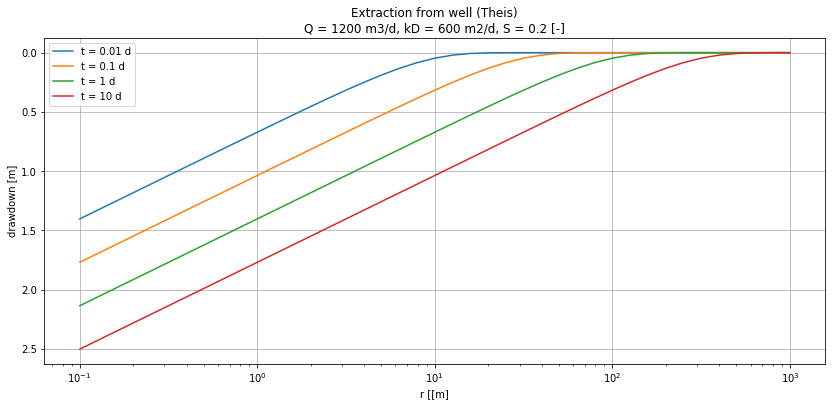

In [3]:
Q = 1200 # m3/d
kD = 600 # m2/d
S = 0.2
r_ = np.logspace(-1, 3, 41)
t  = np.logspace(-2, 1, 4)

ax = newfig(xlabel='r [[m]', ylabel='drawdown [m]', xscale='log')
ax.set_title('Extraction from well (Theis)\nQ = {:.0f} m3/d, kD = {:.0f} m2/d, S = {:.3g} [-]'.format(Q, kD, S))
ax.invert_yaxis()
for ti in t:
    s = Q / (4 * np.pi * kD) * exp1((r_ ** 2 * S)/(4 * kD * ti))
    ax.plot(r_, s, label='t = {:.3g} d'.format(ti))
ax.legend()

### Do the same thing but show the result as a function of time for different distances

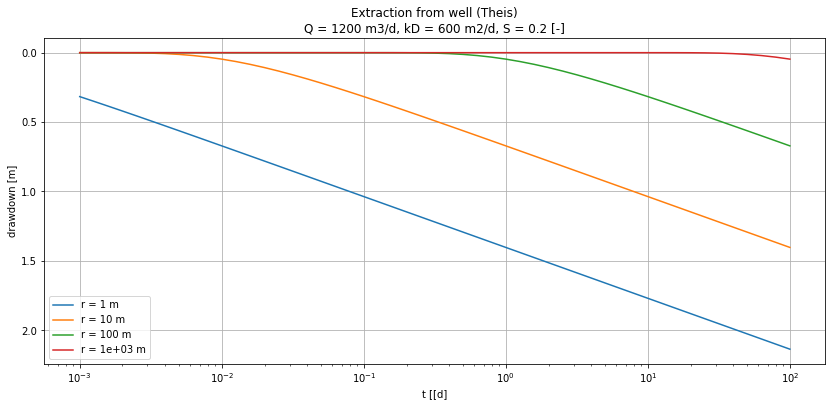

In [4]:
Q = 1200 # m3/d
kD = 600 # m2/d
S = 0.2
t_ = np.logspace(-3, 2, 51)
r  = np.logspace(0, 3, 4)

ax = newfig(xlabel='t [[d]', ylabel='drawdown [m]', xscale='log')
ax.set_title('Extraction from well (Theis)\nQ = {:.0f} m3/d, kD = {:.0f} m2/d, S = {:.3g} [-]'.format(Q, kD, S))
ax.invert_yaxis()
for ri in r:
    s = Q / (4 * np.pi * kD) * exp1((ri ** 2 * S)/(4 * kD * t_))
    ax.plot(t_, s, label='r = {:.3g} m'.format(ri))
ax.legend()

### The function exp1(u) as a power series

The implementation has to special issues
    1) For values of u > 15, the function is essentially zero and would require a large number of loop cycles
    2) The individual terms do not converge voor $u>0$, however, they do so in pairs. Therefore, the loop remembers the two last term and compares the sum of these with the required tolerance (here 10^(-16)). 

In [5]:
def W(u, verbose=False):
    '''Theis well function as a power series'''
    gamma = 0.577216
    u = np.fmin(u, 15)
    w = - gamma - np.log(u) + u
    term0 = u
    for n in range(1, 1000):
        term1 = - u * n  / (n + 1) ** 2 * term0
        w += term1
        if np.all(np.abs(term0 + term1) < 1e-16):
            if verbose:
                print('Power series converged at n = {}'.format(n))
            break
        else: term0 = term1
    return w

Power series converged at n = 65


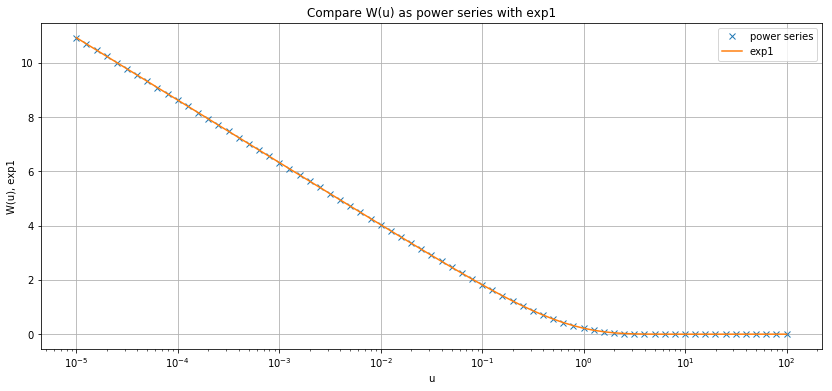

In [6]:
ax = newfig(title='Compare W(u) as power series with exp1', xlabel='u', ylabel='W(u), exp1', xscale='log')
u = np.logspace(-5, 2, 71)
ax.plot(u, W(u, verbose=True), 'x', label = 'power series')
ax.plot(u, exp1(u), label = 'exp1')
ax.legend()

# Theis type curve

The theis type curve is $\mathtt{exp1}(u)$ vs $1/u$.

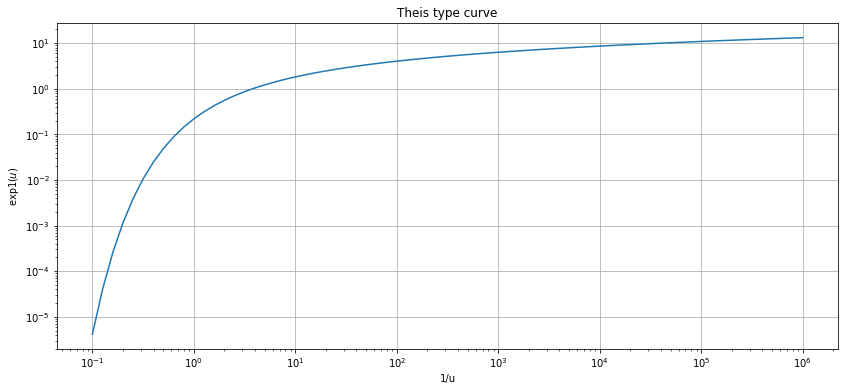

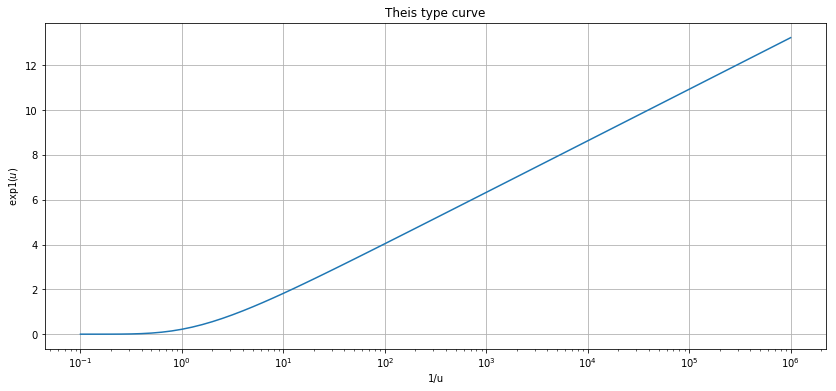

In [226]:
ax0=newfig(title='Theis type curve', xlabel='1/u', ylabel='$\mathtt{exp1}(u)$', yscale='log', xscale='log')
ax1=newfig(title='Theis type curve', xlabel='1/u', ylabel='$\mathtt{exp1}(u)$', yscale='Linear', xscale='log')
#ax1.invert_yaxis()

u = np.logspace(-6, 1, 71)    
ax0.plot(1/u, exp1(u))
ax1.plot(1/u, exp1(u))

# A classical pumping test analysis, using, Theis (double-log graphs)


No handles with labels found to put in legend.


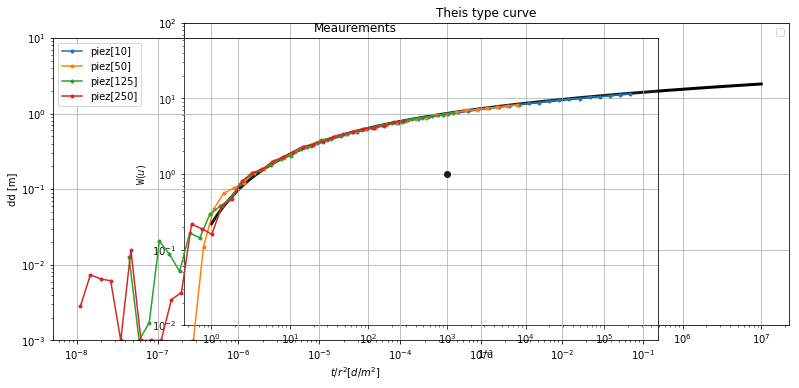

In [10]:
rw = [10, 50, 125, 250] # m
kD = 600 # m2/d
S = 0.001 # []
Q = 1200 # m3/d
sigma = 0.01 # m std of measurement error
np.random.seed(4)

tm = np.logspace(0, 4, 33) # min, 8 points per log cycle
td = tm / (24 * 60) # observations in days

piez = dict()
for i, ri in enumerate(rw):
    u = ri ** 2 * S / (4 * kD * td)
    e = sigma * randn(len(u))
    s = Q/(4 * np.pi * kD) * exp1(u) + e
    s[s< 1e-3] = 1e-3 # keeps values positive for log graph
    piez[i] = {'r':ri, 'u':u, 's':s}

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(14, 7)
ax[0].set_title('Theis type curve')
ax[1].set_title('Meaurements')
ax[0].set_xlabel('1/u')
ax[1].set_xlabel('$t/r^2 [d/m^2]$')
ax[0].set_ylabel('$\mathtt{W}(u)$')
ax[1].set_ylabel('dd [m]')
for a in ax:
    a.grid()
    a.set_xscale('log')
    a.set_yscale('log')


u = np.logspace(-7, 0, 91)
ax[0].plot(1/u, exp1(u), 'k-', lw=3)
ax[0].set_ylim((0.01, 100))
ax[1].set_ylim((0.001, 10))

for k in piez:
    ax[1].plot(td/piez[k]['r'] ** 2, piez[k]['s'], '.-', label='piez[{:.0f}]'.format(piez[k]['r']))

ax[0].legend()
ax[1].legend()


pos0 = (0.28, 0.28, 0.6, 0.6)
pos1 = (0.15, 0.25, 0.6, 0.6)

ax[0].set_position(pos=pos0)
ax[1].set_position(pos=pos1)
ax[1].patch.set_alpha(0.1)
ax[0].plot(1e3, 1e0, 'ko')



# A pumping test, using Theis

,piez[10],piez[50],piez[125],piez[250]
t[min],,,,
1.00,0.37,0.00,0.01,0.00
1.33,0.41,0.02,0.00,0.01
1.78,0.44,0.05,0.00,0.01
2.37,0.50,0.09,0.02,0.01
3.16,0.54,0.10,0.01,0.00
4.22,0.57,0.12,0.01,0.02
5.62,0.63,0.17,0.03,0.00
7.50,0.68,0.18,0.02,0.00
10.00,0.73,0.24,0.05,0.00


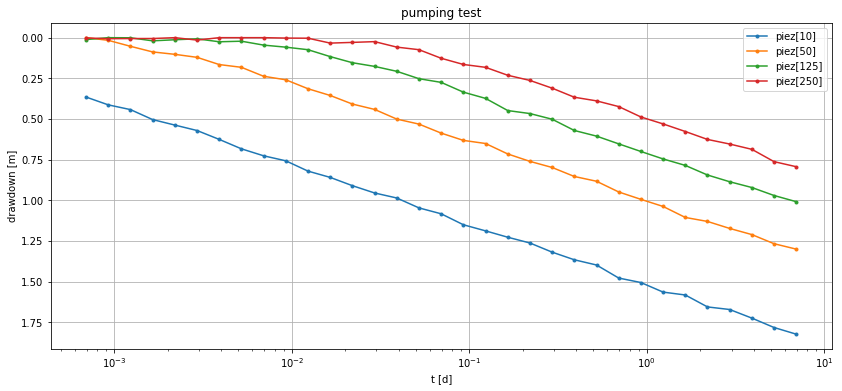

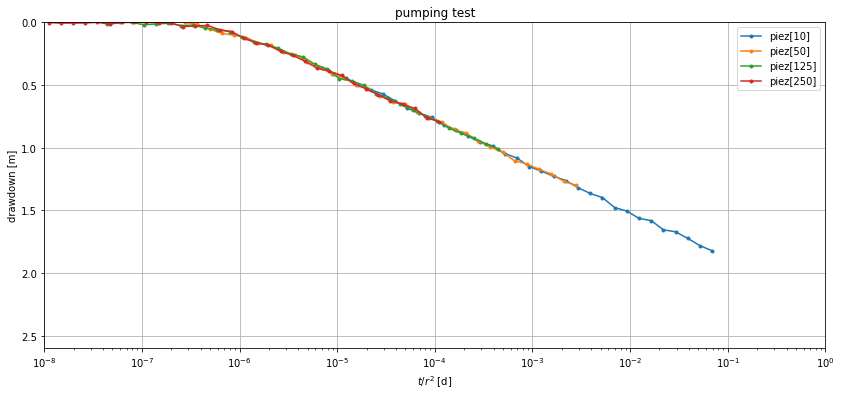

In [11]:
rw = [10, 50, 125, 250] # m
kD = 600 # m2/d
S = 0.001 # []
Q = 1200 # m3/d
sigma = 0.01 # m std of measurement error
np.random.seed(4)

tm = np.logspace(0, 4, 33) # min, 8 points per log cycle
td = tm / (24 * 60) # observations in days

piez = dict()
for i, ri in enumerate(rw):
    u = ri ** 2 * S / (4 * kD * td)
    e = sigma * randn(len(u))
    s = Q/(4 * np.pi * kD) * exp1(u) + e
    s[s< 1e-3] = 1e-3 # keeps values positive for log graph
    piez[i] = {'r':ri, 'u':u, 's':s}

ax0 = newfig(title='pumping test', xlabel='t [d]', ylabel= 'drawdown [m]', xscale='log', yscale='log')
ax1 = newfig(title='pumping test', xlabel='$t/r^2$ [d]', ylabel= 'drawdown [m]', xscale='log', yscale='log')

if False:
    pass
else:
    ax0.set_yscale('linear')
    ax1.set_yscale('linear')
    ax0.invert_yaxis()
    ax1.invert_yaxis()
    ax1.set_xlim((1e-8, 1))
    ax1.set_ylim((1.85, 0))


for k in piez:
    ax0.plot(td, piez[k]['s'], '.-', label='piez[{:.0f}]'.format(piez[k]['r']))
    ax1.plot(td/piez[k]['r'] ** 2, piez[k]['s'], '.-', label='piez[{:.0f}]'.format(piez[k]['r']))
    
ax1.set_xlim((1e-8, 1))
ax1.set_ylim((2.6, 0))

ax0.legend()
ax1.legend()
    
columns = ['piez[{}]'.format(ri) for ri in rw]
index = tm.round(2)
data = pd.DataFrame(data=None, index=index, columns=columns)
data.index.name='t[min]'
for col, k in zip(columns, piez):
    data[col] = piez[k]['s'].round(2)

data


### Multiple drawdowns half-log versus time ans versus distance

$$s = \frac{2.3 Q}{4\pi kD} \log_{10}\left(\frac{2.25 kD t}{r^2 S}\right)$$

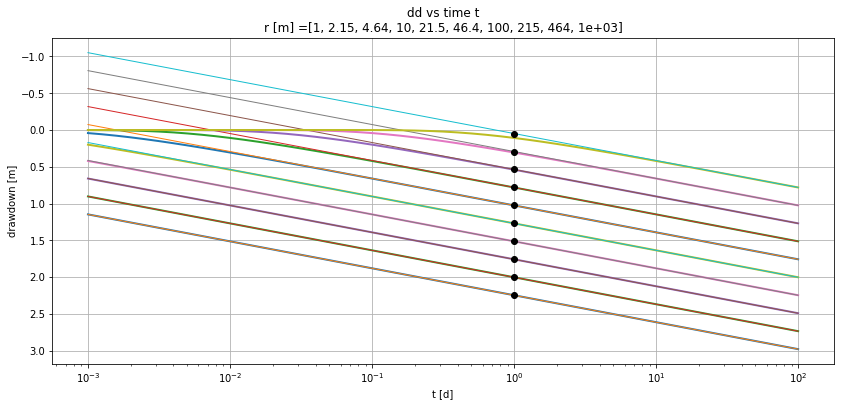

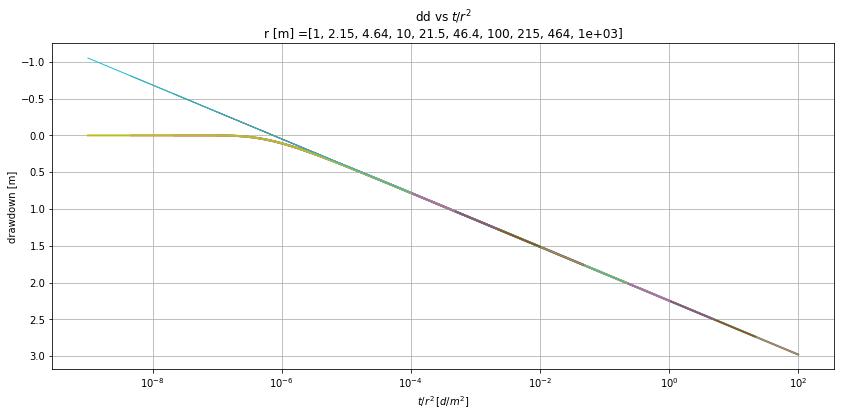

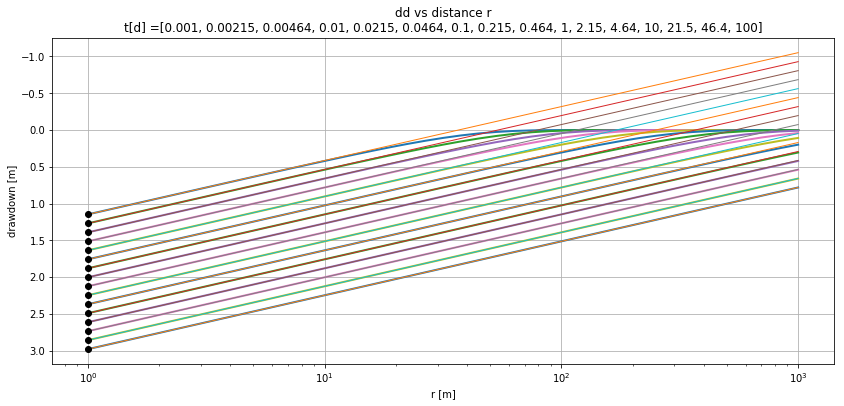

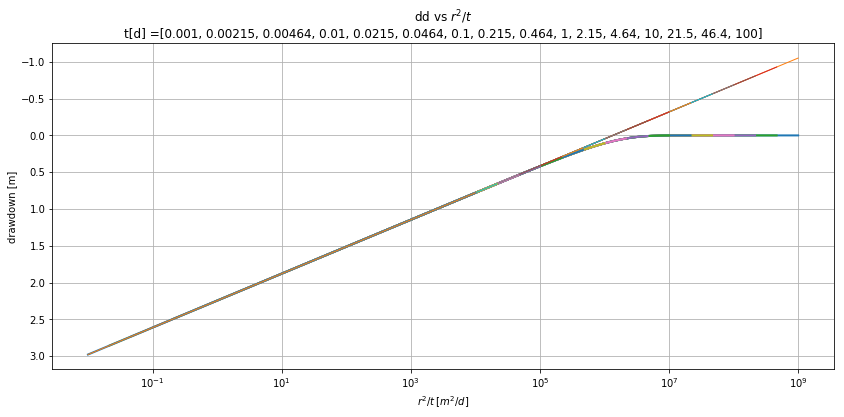

In [12]:
rw = np.logspace(0, 3, 10) # m
t = np.logspace(-3, 2, 16) # d

r_ = np.logspace(0,  3, 41)
t_ = np.logspace(-3, 2, 51)

kD = 600 # m2/d
S = 0.001 # []
Q = 1200 # m3/d

times     = '\nt[d] =[' + ', '.join(['{:.3g}'.format(ti) for ti in t]) + ']'
distances = '\nr [m] =[' + ', '.join(['{:.3g}'.format(ri) for ri in rw]) + ']'

ax0 = newfig(title='dd vs time t' + distances, xlabel='t [d]', ylabel= 'drawdown [m]', xscale='log', yscale='linear')
ax1 = newfig(title='dd vs $t/r^2$' + distances, xlabel='$t/r^2\, [d/m^2]$', ylabel= 'drawdown [m]', xscale='log', yscale='linear')
ax2 = newfig(title='dd vs distance r' + times, xlabel='r [m]', ylabel= 'drawdown [m]', xscale='log', yscale='linear')
ax3 = newfig(title='dd vs $r^2/t$' + times, xlabel='$r^2/t\, [m^2/d]$', ylabel= 'drawdown [m]', xscale='log', yscale='linear')

for ax in [ax0, ax1, ax2, ax3]:
    ax.invert_yaxis()

for ri in rw:
    u = ri ** 2 * S / (4 * kD * t_)
    s0 = Q/(4 * np.pi * kD) * exp1(u)
    s1 = Q/(4 * np.pi * kD) * np.log((2.25 * kD * t_)/(ri ** 2 * S))
                                    
    ax0.plot(t_, s0, lw=2)
    ax0.plot(t_, s1, lw=1)
    ax0.plot(1, Q / (4 * np.pi * kD) * np.log((2.25 * kD * 1) / (ri ** 2 * S)), 'ko')
    
    ax1.plot(t_/ri ** 2, s0, lw=2)
    ax1.plot(t_/ri ** 2, s1, lw=1)

for ti in t:
    u = r_ ** 2 * S / (4 * kD * ti)
    s0 = Q/(4 * np.pi * kD) * exp1(u)
    s1 = Q/(4 * np.pi * kD) * np.log((2.25 * kD * ti)/(r_ ** 2 * S))
                                    
    ax2.plot(r_, s0, lw=2)
    ax2.plot(r_, s1, lw=1)
    ax2.plot(1, Q / (4 * np.pi * kD) * np.log((2.25 * kD * ti) / (1 ** 2 * S)), 'ko')


    ax3.plot(r_ ** 2 / ti, s0, lw=2)
    ax3.plot(r_ ** 2 / ti, s1, lw=1)



# Flow at distance $r$

$$\frac{Q_r}{Q_0} = \exp(-u)$$


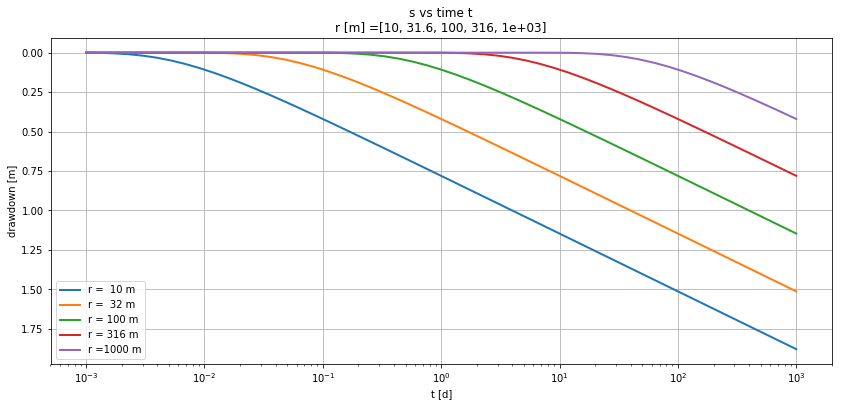

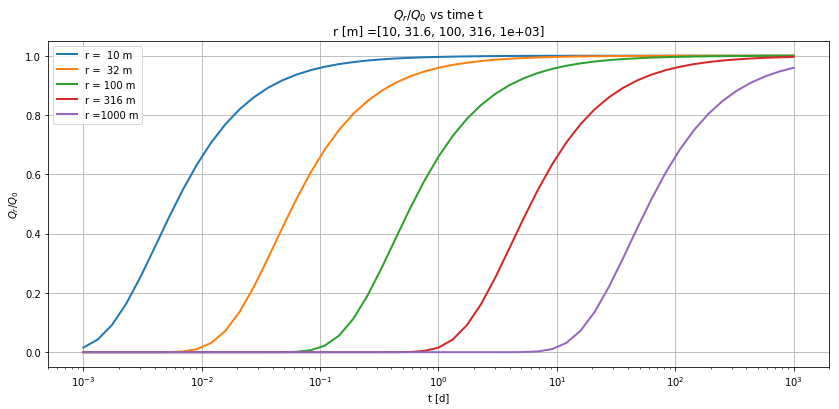

In [13]:
rw = np.logspace(1, 3, 5) # m

t_ = np.logspace(-3, 3, 51)

kD = 600 # m2/d
S = 0.1 # []
Q = 1200 # m3/d

distances = '\nr [m] =[' + ', '.join(['{:.3g}'.format(ri) for ri in rw]) + ']'

ax0 = newfig(title='s vs time t' + distances, xlabel='t [d]', ylabel= 'drawdown [m]', xscale='log', yscale='linear')
ax1 = newfig(title='$Q_r/Q_0$ vs time t' + distances, xlabel='t [d]', ylabel= '$Q_r/Q_0$', xscale='log', yscale='linear')
ax0.invert_yaxis()

for ri in rw:
    u = ri ** 2 * S / (4 * kD * t_)
    s0 = Q/(4 * np.pi * kD) * exp1(u)
    Qr = Q * np.exp(-u)
                                    
    ax0.plot(t_, s0, lw=2, label='r ={:4.0f} m'.format(ri))
    ax1.plot(t_, Qr/Q, lw=2, label='r ={:4.0f} m'.format(ri))
ax0.legend()
ax1.legend()



# Superposition in time

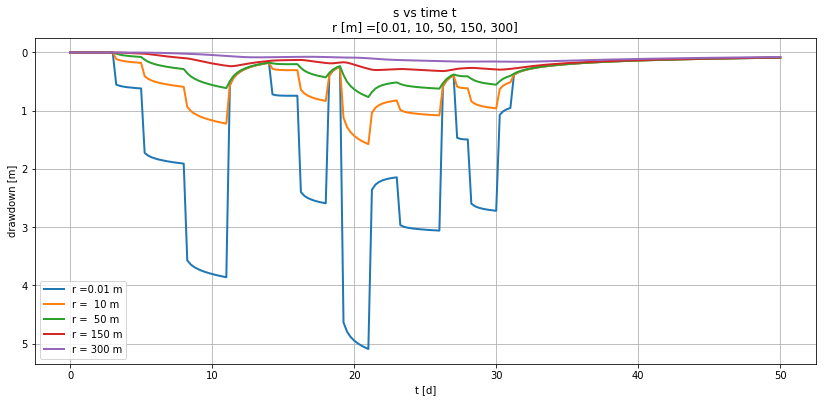

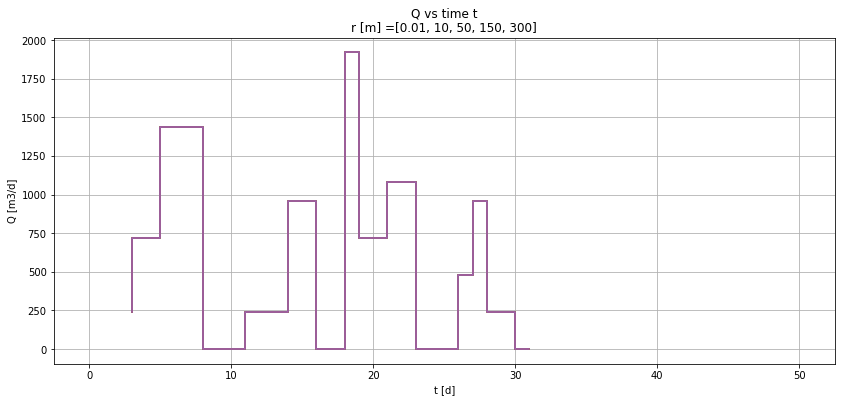

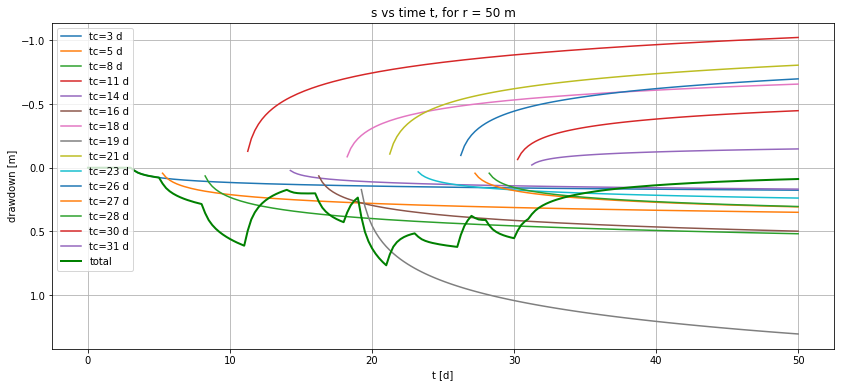

In [14]:
Q  = np.array([0.2, 0.6, 1.2, 0, 0.2, 0.8, 0, 1.6, 0.6, 0.9, 0, 0.4, 0.8, 0.2, 0])   * 1200.
tch = np.cumsum(np.random.randint(1, 4, len(Q)))

dQ = np.diff(np.hstack((0, Q)))

rw = [0.01, 10, 50, 150, 300] # m

t_ = np.linspace(0, 50, 201)

kD = 600 # m2/d
S = 0.1 # []

distances = '\nr [m] =[' + ', '.join(['{:.3g}'.format(ri) for ri in rw]) + ']'

ax0 = newfig(title='s vs time t' + distances, xlabel='t [d]', ylabel= 'drawdown [m]', xscale='linear', yscale='linear')
ax0.invert_yaxis()
ax1 = newfig(title='Q vs time t' + distances, xlabel='t [d]', ylabel= 'Q [m3/d]', xscale='linear', yscale='linear')
ax2 = newfig(title='s vs time t, for r = 50 m', xlabel='t [d]', ylabel= 'drawdown [m]', xscale='linear', yscale='linear')
ax2.invert_yaxis()

for ri in rw:
    s  = np.zeros_like(t_)
    s2 = np.zeros_like(t_)
    for tc, dQc in zip(tch, dQ):
        u = ri ** 2 * S / (4 * kD * (t_[t_ > tc] - tc))
        s[t_ > tc] += dQc/(4 * np.pi * kD) * exp1(u)
        if ri == 50.:
            ds2 = dQc / (4 * np.pi * kD) * exp1(u)
            s2[t_ > tc] += ds2
            ax2.plot(t_[t_>tc], ds2, label='tc={} d'.format(tc))            
    ax0.plot(t_, s, lw=2, label='r ={:4g} m'.format(ri))
    ax1.step(tch, np.cumsum(dQ), where='pre')
    if ri == 50.:
        ax2.plot(t_, s2, 'g', lw=2, label='total')
    
ax1.set_xlim(ax0.get_xlim())
ax0.legend()
ax2.legend()



# Superposition in space

time =  0.500 y well[nw]
time =  1.500 y well[nw] well[ne]
time =  2.500 y well[nw] well[ne] well[se]
time =  3.500 y well[nw] well[ne] well[se] well[sw]


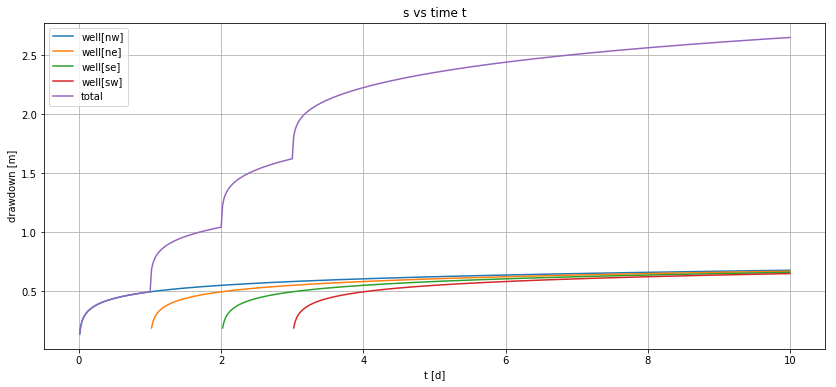

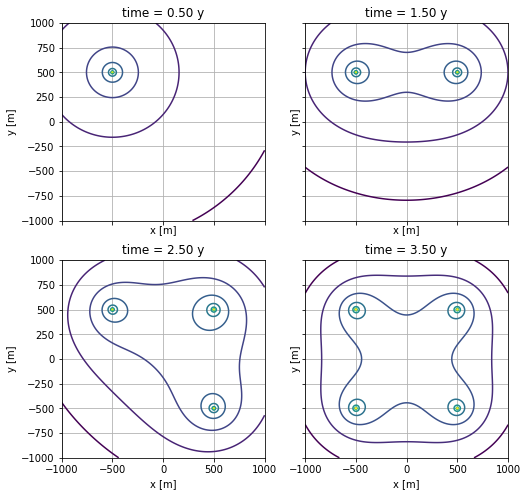

In [15]:
kD = 600 * 365 # m3/y
S = 0.002

wells  = {'nw':{'x':-500., 'y':+500., 't':0.0, 'Q':600 * 365},
          'ne':{'x':+500., 'y':+500., 't':1.0, 'Q':600 * 365},
          'se':{'x':+500., 'y':-500., 't':2.0, 'Q':600 * 365},
          'sw':{'x':-500., 'y':-500., 't':3.0, 'Q':600 * 365},
        }

ax0 = newfig(title='s vs time t', ylabel= 'drawdown [m]', xscale='linear', yscale='linear')

t_ = np.linspace(0, 10, 501)
t_[0] = 0.5 * t_[1] # prevent zero

xp, yp, sp = 0., 0., np.zeros_like(t_)

for w in wells:
    well=wells[w] 
    r = np.sqrt((well['x'] - xp) ** 2 + (well['y'] - yp) ** 2)
    u = r ** 2 * S / (4 * kD * (t_[t_ > well['t']] - well['t']))
    sw = well['Q'] / (4 * np.pi * kD) * exp1(u)
    ax0.plot(t_[t_ > well['t']], sw, label='well[{}]'.format(w))

    sp[t_ > well['t']] += sw
ax0.plot(t_, sp, label='total')
ax0.legend()




fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(8, 8)
ax = [a for a in ax.ravel()]

times = [0.5, 1.5, 2.5, 3.5, 4.5]
for a, ti in zip(ax, times):
    a.set_title('time = {:.2f} y'.format(ti))
    a.set_xlabel('x [m]')
    a.set_ylabel('y [m]')
    a.grid()
    

x = np.linspace(-1000, 1000, 201)
y = np.linspace(-1000, 1000, 201)
X, Y = np.meshgrid(x, y)
rw = 0.1 # well radius

levels = np.linspace(np.floor(np.min(sp)), np.ceil(np.max(sp)), 21)
for ti, a in zip(times, ax):
    s = np.zeros_like(X)
    print('time = {:6.3f} y'.format(ti), end='')
    for w in wells:
        well=wells[w] 
        r = np.sqrt((well['x'] - X) ** 2 + (well['y'] - Y) ** 2)
        r[r < rw] = rw # min distance is well radius
        if ti > well['t']:
            u = r ** 2 * S / (4 * kD * (ti - well['t']))
            s += well['Q'] / (4 * np.pi * kD) * exp1(u)
            print(' well[{}]'.format(w), end='')
    print()
    a.contour(X, Y, s, levels=levels)



# Hantush's well

Hantush(1956) regards we well in a semi-confined aquifer.

$$s(r, t) = \frac Q {4 \pi kD }\mathtt{W}\left(u,\rho\right)\,\,\,\,u=\frac{r^2 S}{3 kD t},\,\,\,\rho=\frac r \lambda $$

with Hantush's well function defined as

$$\mathtt{W}\left(u, \rho\right) = \intop_u^\infty \frac{e^{-y-\frac{\frac 1 4 \rho^2}{y}}}{y} dy $$

## Implemtation of Hantush's well function

Hantush's well function is not available in the Scipy.special library of mathematical functions. Therefore it has to be integrated. Several ways have been published to achieve accurate results. However, a direct integration of the argument proves accurate enough for our purposes.

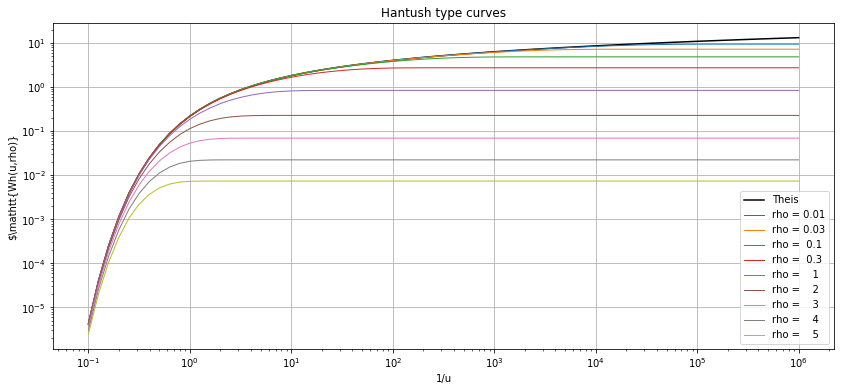

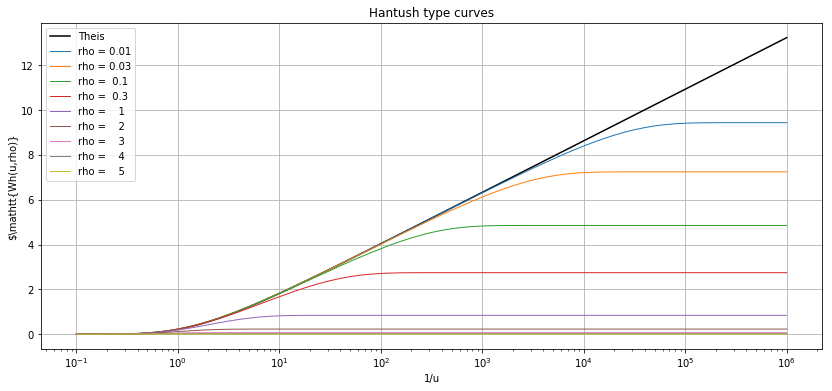

In [223]:
def wh(u, rho, n=1000):
    '''Return wh(u, rho) simple for u and rho scalars'''
    inf = 20
    y = np.logspace(u, np.exp(20), n)
    a = np.exp(-y - (rho/2) ** 2 / y) / y
    dy = np.diff(y)
    dy2 = np.zeros_like(y)
    dy2[:-1] += 0.5 * dy
    dy2[1: ] += 0.5 * dy
    return np.sum(dy2 * a)

def Wh(u, rho, n=5000):
    '''Return Wh(u, rho) for rho scalar'''
    if not np.isscalar(rho):
        raise ValueError('rho must be scalar')
    if not isinstance(u, np.ndarray):
        u = np.array(u)    
    eps, inf = 1.0e-100, 20.0
    y = np.hstack((u, u-eps, np.logspace(np.log10(np.min(u)), inf, n)))
    y.sort()
    a = np.exp(-y - (rho/2) ** 2 / y) / y
    dy = np.diff(y)
    dy2 = np.zeros_like(y)
    dy2[:-1] += 0.5 * dy
    dy2[1: ] += 0.5 * dy
    w = np.zeros_like(u)
    for i, uu in enumerate(u):
        w[i]  = np.sum(a[y >= uu] * dy2[y >= uu])        
    return w
    

u = np.logspace(-6, 1, 71)
rho = [0.01, 0.03, 0.1, 0.3, 1, 2, 3, 4, 5]

ax0 = newfig(title='Hantush type curves', xlabel='1/u', ylabel='$\mathtt{Wh(u,rho)}', xscale='log', yscale='log')
ax1 = newfig(title='Hantush type curves', xlabel='1/u', ylabel='$\mathtt{Wh(u,rho)}', xscale='log', yscale='linear')

ax0.plot(1/u, exp1(u), 'k', label='Theis')
ax1.plot(1/u, exp1(u), 'k', label='Theis')

for rL in rho:
    ax0.plot(1/u, Wh(u, rL), lw=1, label='rho = {:4g}'.format(rL))
    ax1.plot(1/u, Wh(u, rL), lw=1, label='rho = {:4g}'.format(rL))
ax0.legend()
ax1.legend()
    
              

In [17]:
u = 10. ** np.arange(-6, 2)
rho = [0.1, 0.3, 1, 3]

print('Values have been checked. See Kruseman and De Ridder (1994) table 4.2, p298-299')

print(' u -> ' + ' '.join(['{:6g}'.format(uu) for uu in u]))
for rL in rho:
    print('{:4g}  '.format(rL) + ' '.join(['{:.4f}'.format(w) for w in Wh(u, rL)]))


Values have been checked. See Kruseman and De Ridder (1994) table 4.2, p298-299
 u ->  1e-06  1e-05 0.0001  0.001   0.01    0.1      1     10
 0.1  4.8543 4.8543 4.8543 4.8298 3.8155 1.8069 0.2204 0.0000
 0.3  2.7450 2.7450 2.7450 2.7450 2.7105 1.6719 0.2174 0.0000
   1  0.8421 0.8421 0.8421 0.8421 0.8421 0.8192 0.1865 0.0000
   3  0.0695 0.0695 0.0695 0.0695 0.0695 0.0695 0.0535 0.0000


# Well partially penetrating

The extra drawdown around a partially penetrating well has been mathematically derived by Hantush. It's given by

$$ \Delta s = \frac {Q}{2\pi kD}\frac{2D}{d}\sum_{n=1}^\infty\left\{\frac 1 n\left[
\sin\left(\frac{n\pi z_1}{D}\right) - \sin\left(\frac{n\pi z_2}{D}\right)\right] \cos\left(\frac{n\pi z}{D}\right)\mathtt{K}_0\left(\frac{n\pi r}{D}\right)
\right\}$$

In this equation $D$ is the thickness of the aquifer and $d$ the length of the screen, $z_1$ is the elevation of the bottom of the screen, $x_2$ is the elevation of the top of the screen, $z, r$ is are the coordinates of the considered point. Notice that istead of $d$ one should use $z_1 - z_0$ be ensure consistency.

## Implementation

For fix the situation in the implementation we use the 4 relavant elevations: $z_t$, $z_ts$, $z_bs$, $z_b$, which are the top of the aquifer, the top of the well screen, the bottom of the well screen and the bottom of the aquifer respectively. This is easiest to remember. Hence $D = z_t - z_b$ and $d = z_{ts} - z_{bs}$.


In [70]:
def dspp(r=None, z=None, zt=None, zts=None, zbs=None, zb=None, n=20):
    '''Return drawdown effect of partial penetration of well screen without the factor Q/(2 pi kD).
    parameters
    ----------
    r, z : vectors (np.ndarrays)
        vertical and horizontal coordinates
    zt, zts, zbs, zb: four floats
        top aquifer, top screen, bottom screen, bottom aquifer respectively
        The values must decrease to be consistent
    n: int
        maximum in sum
    '''
    if np.any(np.diff(np.array([zt, zts, zbs, zb])) > 0):
        raise ValueError('zt, zts, zbs and zb must be descreasing in value.')
    if np.any(r<=0):
        raise ValueError('r must be all positive')
    if np.any(np.logical_or(z > zt, z < zb)):
        raise ValueError('z must be $\le$ zt and $\ge$ zb')
        
    D, d = zt - zb, zts - zbs
    R, Z = np.meshgrid(r, z)
    
    ds = np.zeros_like(R)
    for i in range(1, n + 1):
        p = i * np.pi/D
        ds += (1/i) * (np.sin(p * zts) - np.sin(p * zbs)) * np.cos(p * Z) * K0(p * R)
        
    return 2 / np.pi * (zt - zb) / (zts - zbs) * ds


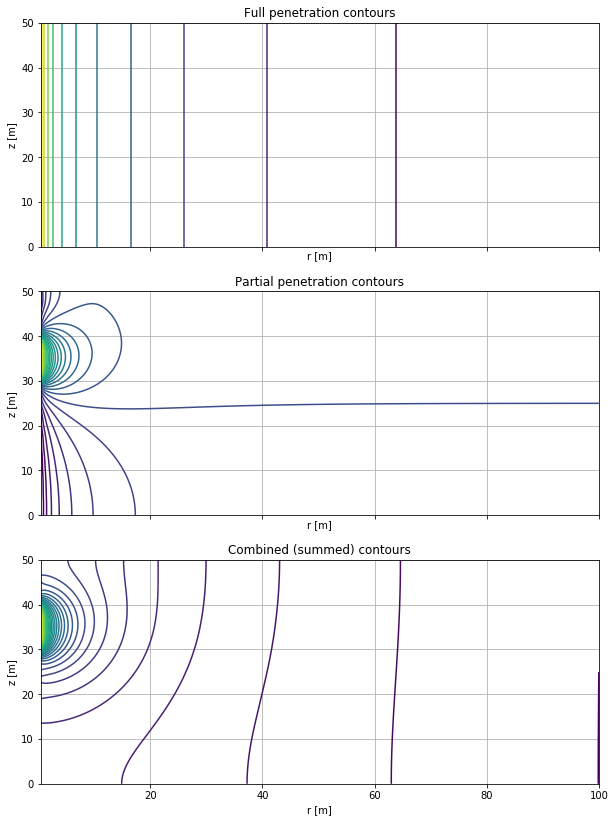

In [80]:
 # Example
rw = .5 # well radius
R0 = 100. # Fixed head boundary
zt, zts, zbs, zb = 50, 40, 30, 0
r = np.logspace(np.log10(rw), np.log10(R0), 100)
z = np.linspace(zb, zt, 101)
R, Z = np.meshgrid(r, z)

Q = 1200 # m3/d
kD = 600 # m2/d
S = 0.0

s = Q / (2 * np.pi * kD) * np.log(R0 / R)
ds = Q / (2 * np.pi * kD) * dspp(r, z, zt, zts, zbs, zb, n=20)

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True)
fig.set_size_inches(10, 14)
ax = ax.ravel()
titles = ['Full penetration contours', 'Partial penetration contours', 'Combined (summed) contours']
for a, title in zip(ax, titles):
    a.set_title(title)
    a.set_xlabel('r [m]')
    a.set_ylabel('z [m]')
    a.grid()
                
levels = np.linspace(np.floor(np.min(s + ds)), np.ceil(np.max(s + ds)), 50)
ax[0].contour(r, z, s, levels=levels)
ax[1].contour(r, z, ds, levels=levels)
ax[2].contour(r, z, s + ds, levels=levels)



In [81]:
levels

array([-1.        , -0.85714286, -0.71428571, -0.57142857, -0.42857143,
       -0.28571429, -0.14285714,  0.        ,  0.14285714,  0.28571429,
        0.42857143,  0.57142857,  0.71428571,  0.85714286,  1.        ,
        1.14285714,  1.28571429,  1.42857143,  1.57142857,  1.71428571,
        1.85714286,  2.        ,  2.14285714,  2.28571429,  2.42857143,
        2.57142857,  2.71428571,  2.85714286,  3.        ,  3.14285714,
        3.28571429,  3.42857143,  3.57142857,  3.71428571,  3.85714286,
        4.        ,  4.14285714,  4.28571429,  4.42857143,  4.57142857,
        4.71428571,  4.85714286,  5.        ,  5.14285714,  5.28571429,
        5.42857143,  5.57142857,  5.71428571,  5.85714286,  6.        ])

# Large-diameter wells (Cooper and Papadopoulos (1967))

This analytical solution is valid for a well with casing radius $r_x$ that may be large so that the storage in the casing is important. The screen radius $r_w$ and the distance from the well center $r$ are independent of $r_c$. The mathematical expression comes from the original paper; Kruseman and De Ridder (1994) only contains the tables. But one can use these tables to verify the implementation.

$$s = \frac Q {4\pi k \overline{h}} F(u_w, \alpha, \frac r {r_w})$$


$$F = \frac {8 \alpha} \pi \intop_0^\infty{\left(1-e^{-\frac{\beta^2}{4 u_w}}\right)
\frac{J_0\left(\frac r {r_w} \beta \right) Y - Y_0\left(\frac r {r_w} \beta \right) J}{\beta^2\left\{Y^2+J^2\right\}}d\beta
} $$

Where $J_0, J_1, Y_0 and Y_1$ are Bessel function and

$$J  = \beta J_0(\beta) - 2 \alpha J_1(\beta)$$
$$Y = \beta Y_0(\beta) - 2 \alpha Y_1(\beta)$$
with
$$\alpha = \frac {r_w^2 S}{r_c^2}$$
with $S$ the specific yield, $r_w$ the screen radius and $r_c$ the casing radius.
$$u_w = \frac {r_w^2 S}{4 k\overline{h} t}$$

with $ k \overline{h} $ the transmissivity and $r$ the radius from the well and $t$ time.

And, because large-diameter wells mostly operate in water-table aquifers in which the aquifer thickness varies with time (and space), $\overline{h}$ must be chosen a good average value for the aquifer thickness.

In [211]:
def ldwell(rw=None, rc=None, kD=None, S=None, t=None, r=None):
    '''Return the drawdown for a large-diameter well
    parameters
    ----------
    rw, rc: floats
        well radius in aquifer, and wider upper part with storage above the screen
    kD, S: float
        transmissivity and storage coefficient
    t: ndarray
        time at which drawdown is desired
    r: scalar
        distance to well
    '''
    uw = rw ** 2 * S / (4 * kD * t)
    alpha = S * (rw/rc) ** 2
    rrw = r / rw
    return ppco67(uw, alpha, rrw)
    
    
def ppco67(uw=None, alpha=None, rrw=None):
    '''Return function values for solution of Papadopulos and Cooper for large diameter well
    parameters
    ----------
    uw : float or array
        uw = rw ** S  / (4 kD t)
    alpha: float
        alpha = S (rw/rc) ** 2
    rrw = r / rw    
    '''
    if not np.isscalar(rrw):
        raise ValueError('rrw must be a float (scalar).')
    if not np.isscalar(alpha):
        raise ValueError('alpha must be a float (scalar).')
    if np.isscalar(uw):
        uw = np.array([uw])
    
    uw = uw[np.newaxis, :]

    beta = np.logspace(-6, 20, 2000)[:, np.newaxis]
    J = beta * J0(beta) - 2 * alpha * J1(beta)
    Y = beta * Y0(beta) - 2 * alpha * Y1(beta)
    F = 8 * alpha / np.pi * (J0(beta * r / rw) * Y - Y0(beta * r / rw) * J) / (beta ** 2 * (Y ** 2 + J ** 2))
    
    arg = (1 - np.exp(- beta ** 2 /(4 * uw))) * F
    db = np.zeros_like(beta)
    db[:-1, 0] += np.diff(beta[:, 0]) / 2.
    db[1: , 0] += np.diff(beta[:, 0]) / 2.
    
    return np.sum(arg * db, axis=0)


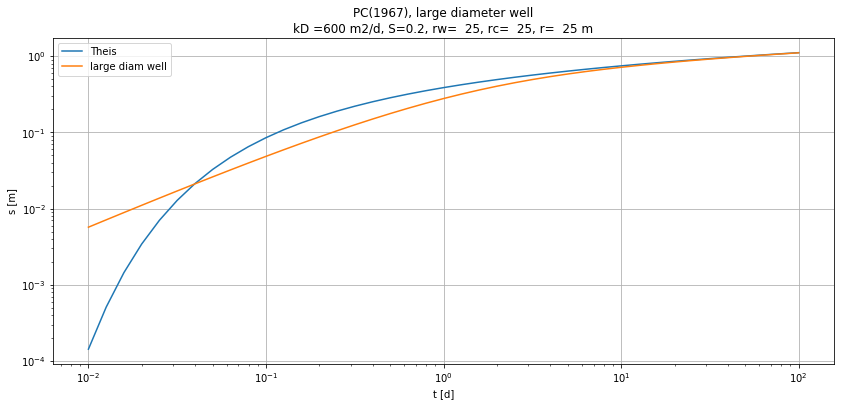

In [212]:
kD = 600 # m2/d
S = 0.2
rc = 25
rw = rc
r  = rc
t = np.logspace(-2, 2, 41)

uw = rw ** 2 * S / (4 * kD * t)
title = 'PC(1967), large diameter well\nkD ={:.0f} m2/d, S={:2g}, rw={:4g}, rc={:4g}, r={:4g} m'.format(kD, S, rw, rc, r)
s = Q / (4 * np.pi * kD) * ldwell(t=t, r=r, rw=rw, rc=rc, kD=kD, S=S)
ax = newfig(title=title, xlabel='t [d]', ylabel='s [m]', xscale='log', yscale='log')

ax.plot(t, Q/ (4 * np.pi * kD) * exp1(uw), label='Theis')
ax.plot(t, s, label='large diam well')
ax.legend()

## Large-diameter Papadopoulos -Cooper type curves

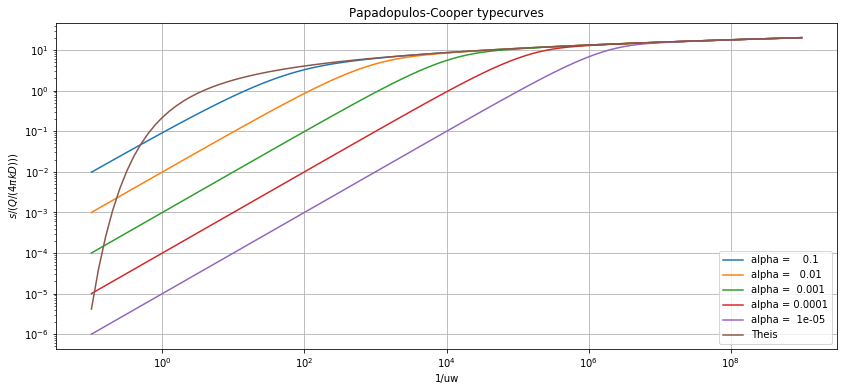

In [222]:
uw = np.logspace(-9, 1, 101)
alpha = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]  # for type curve rw = rc
rrw = 1

ax=newfig('Papadopulos-Cooper typecurves', xlabel='1/uw', ylabel='$s/(Q/(4\pi kD))$)', xscale='log', yscale='log')
for a in alpha:
    s = ppco67(uw, a, rrw)
    ax.plot(1/uw, s, label='alpha = {:6g}'.format(a))
ax.plot(1/uw, exp1(uw), label='Theis')
ax.legend()